In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
dir_results = 'retrained_models/metrics'
flist       = glob.glob(f'{dir_results}/*.csv')
RESULTS={}
for k, kf in enumerate(flist): # kf = f_csv
    RESULTS[k] = {}
    RESULTS[k]['lot'] = kf.split('_')[-3]
    RESULTS[k]['trial'] = kf.split('_')[-2]
    RESULTS[k]['fn'] = kf.split('/')[-1]

    # collect csv data
    work = pd.read_csv(kf)
    RESULTS[k]['val_loss'] = work['val_loss'].to_numpy()
    RESULTS[k]['min_val_loss'] = work['val_loss'].min()
    RESULTS[k]['epoch'] = work['epoch']
        

In [3]:
RESULTS[0]

{'lot': 'lot-29',
 'trial': 'trial',
 'fn': 'step2_lot-29_trial_0144.metrics.csv',
 'val_loss': array([0.00362614, 0.00361774, 0.00358598, 0.00355794, 0.0035531 ,
        0.00353492, 0.00351693, 0.0035016 , 0.00352697, 0.00349579,
        0.00348328, 0.00347926, 0.00348551, 0.00348458, 0.00347411,
        0.00346336, 0.00346531, 0.00347305, 0.00344219, 0.00343525,
        0.00342588, 0.0034245 , 0.00342843, 0.00340869, 0.0034131 ,
        0.00341058, 0.00340897, 0.00340257, 0.00340373, 0.00340233,
        0.0034031 , 0.00339699, 0.00339397, 0.00339843, 0.00340269,
        0.00340131]),
 'min_val_loss': 0.003393966704607,
 'epoch': 0      0
 1      1
 2      2
 3      3
 4      4
 5      5
 6      6
 7      7
 8      8
 9      9
 10    10
 11    11
 12    12
 13    13
 14    14
 15    15
 16    16
 17    17
 18     0
 19     1
 20     2
 21     3
 22     4
 23     5
 24     6
 25     7
 26     8
 27     9
 28    10
 29    11
 30    12
 31    13
 32    14
 33    15
 34    16
 35    17
 N

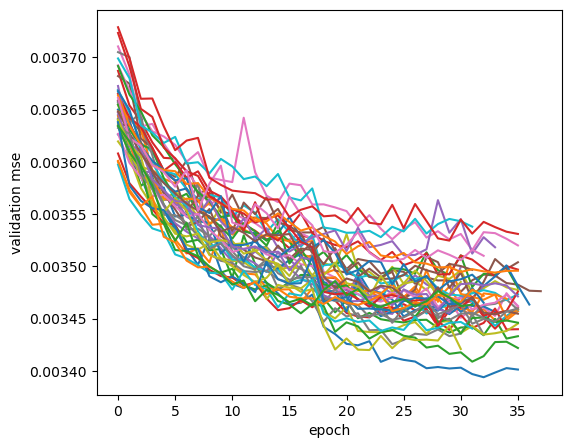

In [4]:
# Showing all top 44 models

fig, ax = plt.subplots()
for k in RESULTS.keys():
    plotdata = RESULTS[k]
    ax.plot(plotdata['val_loss'],label=k)
    
    # dahsed black line:
    # shows "when training was stopped and resumed"
    if False:
        ind_resume = plotdata['epoch'].loc[plotdata['epoch'] ==0 ].index[-1]
        ax.axvline(ind_resume, color='k', ls='--')
    
ax.set_xlabel('epoch')
ax.set_ylabel('validation mse')
fig.set_size_inches(6,5)

In [5]:
# showing each model individually

for k in RESULTS.keys():
    fig, ax = plt.subplots()
    plotdata = RESULTS[k]
    ax.plot(plotdata['val_loss'],label=k)
    ax.set_title(f'{RESULTS['lot']} / {RESULTS['trial']}')
    ax.set_xlabel('epoch')
    ax.set_ylabel('validation mse')
    
    # dahsed black line:
    # shows "when training was stopped and resumed"
    ind_resume = plotdata['epoch'].loc[plotdata['epoch'] ==0 ].index[-1]
    ax.axvline(ind_resume, color='k', ls='--')
    print(ind_resume)

SyntaxError: f-string: unmatched '[' (3038862582.py, line 7)